In [42]:
from math import log1p

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import kdeplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv('train.csv', usecols=['Survived', 'Age','Fare'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


Text(0.5, 1.0, 'Fare')

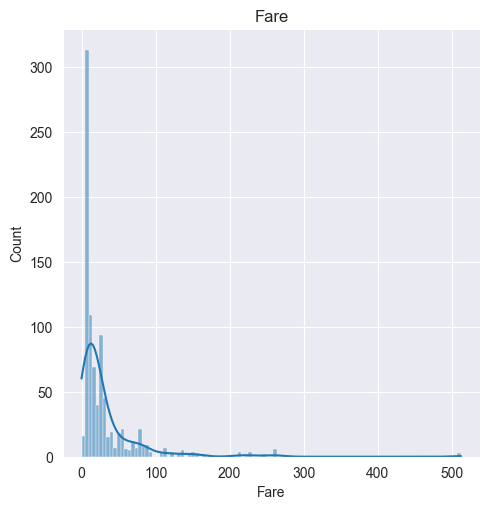

In [9]:
sns.displot(df['Fare'], kde = True)
plt.title('Fare')

In [25]:
trf = ColumnTransformer(transformers=[
    ('trf1', SimpleImputer(), [1])
], remainder = 'passthrough')

In [26]:
df = trf.fit_transform(df)

In [31]:
df = pd.DataFrame(df, columns=['Age','Survived', 'Fare'])

In [32]:
df.head()

,Age,Survived,Fare
0,22.0,0.0,7.2500
1,38.0,1.0,71.2833
2,26.0,1.0,7.9250
3,35.0,1.0,53.1000
4,35.0,0.0,8.0500


Text(0.5, 1.0, 'Fare')

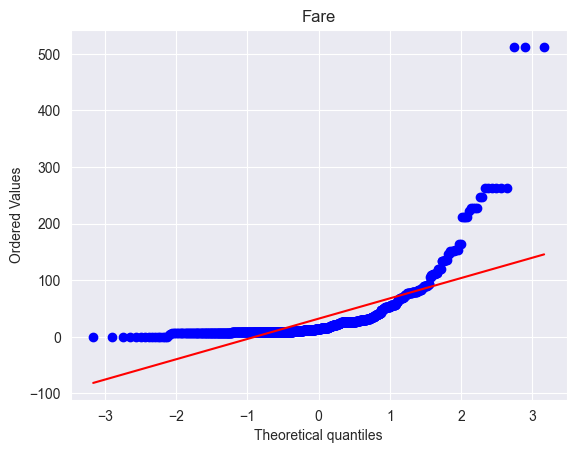

In [33]:
stats.probplot(df['Fare'], dist = "norm", plot= plt)
plt.title('Fare')

In [48]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

In [49]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1), df['Survived'] ,test_size=0.33, random_state=42)

In [50]:
X_test.shape

(295, 2)

In [51]:
df.isnull().sum()

Age         0
Survived    0
Fare        0
dtype: int64

In [52]:
lr.fit(X_train, y_train)
clf.fit(X_train, y_train)

y_lr_pred = lr.predict(X_test)
y_clf_pred = clf.predict(X_test)

In [66]:
y_clf_pred

array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0.

In [74]:
print('Accuracy_score', accuracy_score(y_test, y_lr_pred))
print('Accuracy_score', accuracy_score(y_test, y_clf_pred))

Accuracy_score 0.6576271186440678
Accuracy_score 0.6338983050847458


In [75]:
trf = FunctionTransformer(func= np.log1p)

In [77]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

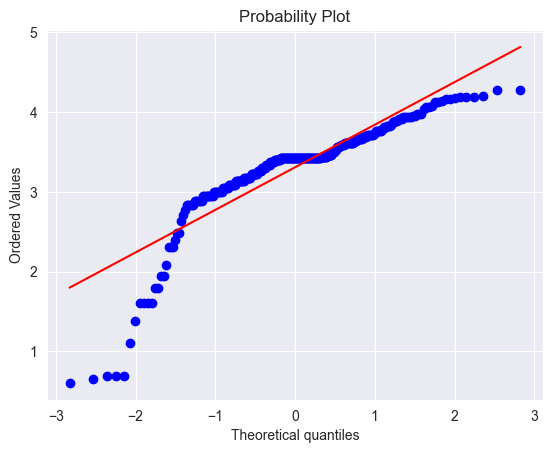

In [92]:
stats.probplot(X_test_transformed['Age'], dist = "norm", plot= plt)
plt.show()

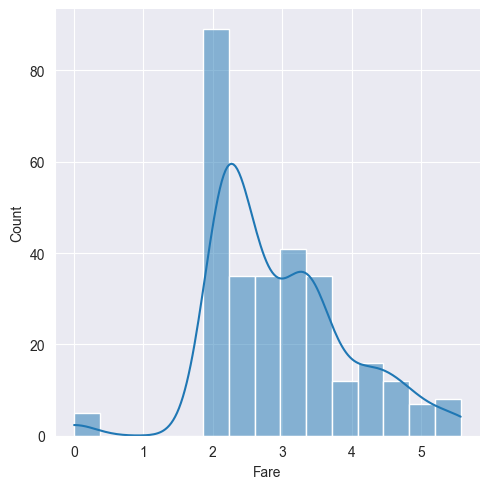

In [82]:
sns.displot(X_test_transformed['Fare'], kde = True)

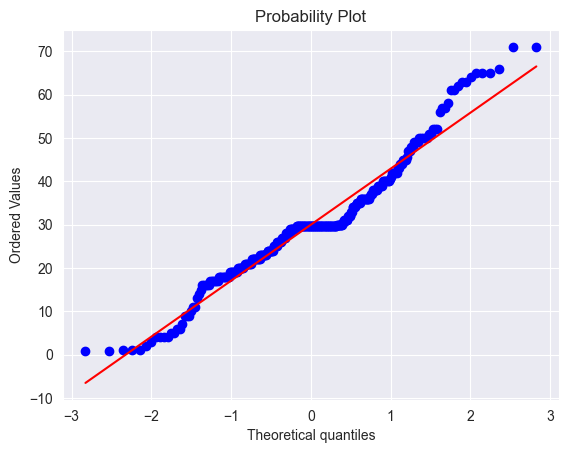

In [93]:
stats.probplot(X_test['Age'], dist = "norm", plot= plt)
plt.show()

In [83]:
clf = DecisionTreeClassifier()
lr = LogisticRegression()

In [85]:
clf.fit(X_train_transformed, y_train)
lr.fit(X_train_transformed, y_train)

LogisticRegression()

In [86]:
y_pred_trans_clf = clf.predict(X_test_transformed)
y_pred_trans_lr = lr.predict(X_test_transformed)

In [91]:
print('Accuracy_score of clf', accuracy_score(y_test, y_pred_trans_clf))
print('Accuracy_score of lr', accuracy_score(y_test, y_pred_trans_lr))

Accuracy_score of clf 0.6440677966101694
Accuracy_score of lr 0.6847457627118644


In [90]:
print("Lr", np.mean(cross_val_score(lr, X_test_transformed, y_test, cv=10)))
print("Clf", np.mean(cross_val_score(clf, X_test_transformed, y_test, cv=10)))

Lr 0.7218390804597703
Clf 0.6881609195402298


In [94]:
ft = FunctionTransformer(func=np.log1p)

In [96]:
X_train['Fare'] = ft.fit_transform(X_train['Fare'])

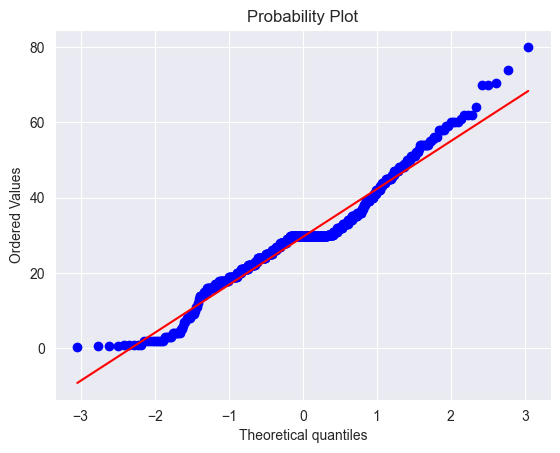

In [99]:
stats.probplot(X_train['Age'], dist = "norm", plot= plt)
plt.show()

In [ ]:
clf.fit(X_train, y_train)
lr.fit(X_train, y_train)

In [100]:
y_pred_trans_clf = clf.predict(X_test)
y_pred_trans_lr = lr.predict(X_test)

In [101]:
print('Accuracy_score of clf', accuracy_score(y_test, y_pred_trans_clf))
print('Accuracy_score of lr', accuracy_score(y_test, y_pred_trans_lr))

Accuracy_score of clf 0.5966101694915255
Accuracy_score of lr 0.7152542372881356
